# This example contains the model with the leaver (TF-element)


In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re
import networkx as nx

sys.path.append("../run/")
import BondGraph as bg

Example 3: 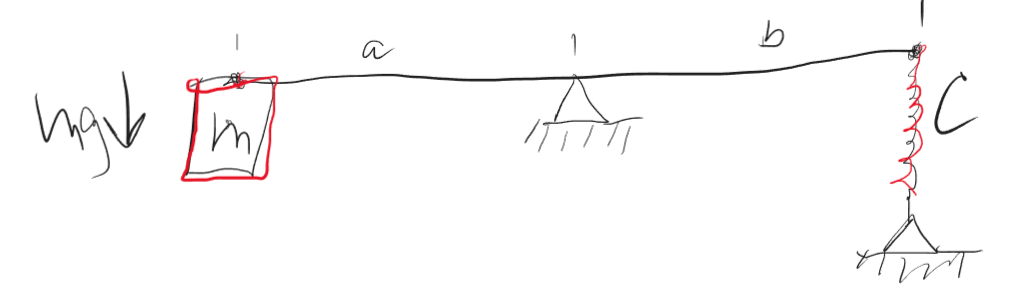

In [3]:
# Create empty model
model = bg.BondGraph(Name ='My Bond graph model with TF')

In [4]:
#Create some elements
TF_1 = bg.BGelement('TF')

SE_1 = bg.BGelement('SE')
C_1 = bg.BGelement('C')
#R_1 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I')
OneJ_1 = bg.BGelement('1')
OneJ_2 = bg.BGelement('1')
OneJ_3 = bg.BGelement('1')
OneJ_4 = bg.BGelement('1')
ZeroJ_1 = bg.BGelement('0')
SF_1 = bg.BGelement('SF')

# print(C)

In [5]:
# Add the created elements to the model
model.addElement(OneJ_1)
model.addElement(OneJ_2)
model.addElement(OneJ_3)
model.addElement(OneJ_4)
model.addElement(ZeroJ_1)
model.addElement(C_1)
# model.addElement(R_1)

model.addElement(I_1)
model.addElement(SE_1)
model.addElement(SF_1)

model.addElement(TF_1)
# print(model)

In [6]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(TF_1, OneJ_1)
model.connect(TF_1, OneJ_2)
model.connect(OneJ_2, ZeroJ_1)
model.connect(ZeroJ_1, OneJ_3)
model.connect(ZeroJ_1, OneJ_4)
model.connect(C_1, OneJ_3)
# model.connect(R_1, OneJ_2)
model.connect(OneJ_4, SF_1)

In [7]:
bg.show_ports_state(model)

Element name:  1_4
++ port_id: 1 |  arrow:  None |  causality:  None
++ port_id: 3 |  arrow:  None |  causality:  None
++ port_id: 5 |  arrow:  None |  causality:  None
Element name:  1_5
++ port_id: 7 |  arrow:  None |  causality:  None
++ port_id: 8 |  arrow:  None |  causality:  None
Element name:  1_6
++ port_id: 11 |  arrow:  None |  causality:  None
++ port_id: 15 |  arrow:  None |  causality:  None
Element name:  1_7
++ port_id: 13 |  arrow:  None |  causality:  None
++ port_id: 16 |  arrow:  None |  causality:  None
Element name:  0_8
++ port_id: 9 |  arrow:  None |  causality:  None
++ port_id: 10 |  arrow:  None |  causality:  None
++ port_id: 12 |  arrow:  None |  causality:  None
Element name:  C_2
++ port_id: 14 |  arrow:  None |  causality:  None
Element name:  I_3
++ port_id: 2 |  arrow:  None |  causality:  None
Element name:  SE_1
++ port_id: 0 |  arrow:  None |  causality:  None
Element name:  SF_9
++ port_id: 17 |  arrow:  None |  causality:  None
Element name:  TF_0

In [8]:
model.applyRules()

TF has NOne causality
NB! None val
NB! None val
NB! None val
TF has NOne causality
TF has NOne causality
NB! None val
NB! None val
TF has NOne causality
TF has NOne causality


In [9]:
bg.show_ports_state(model)

Element name:  1_4
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 5 |  arrow:  Output |  causality:  Causal
Element name:  1_5
++ port_id: 7 |  arrow:  Input |  causality:  Uncausal
++ port_id: 8 |  arrow:  Output |  causality:  Causal
Element name:  1_6
++ port_id: 11 |  arrow:  Input |  causality:  Uncausal
++ port_id: 15 |  arrow:  Output |  causality:  Causal
Element name:  1_7
++ port_id: 13 |  arrow:  Input |  causality:  Causal
++ port_id: 16 |  arrow:  Output |  causality:  Uncausal
Element name:  0_8
++ port_id: 9 |  arrow:  Input |  causality:  Uncausal
++ port_id: 10 |  arrow:  Output |  causality:  Causal
++ port_id: 12 |  arrow:  Output |  causality:  Uncausal
Element name:  C_2
++ port_id: 14 |  arrow:  Input |  causality:  Uncausal
Element name:  I_3
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  SE_1
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  SF_9
+

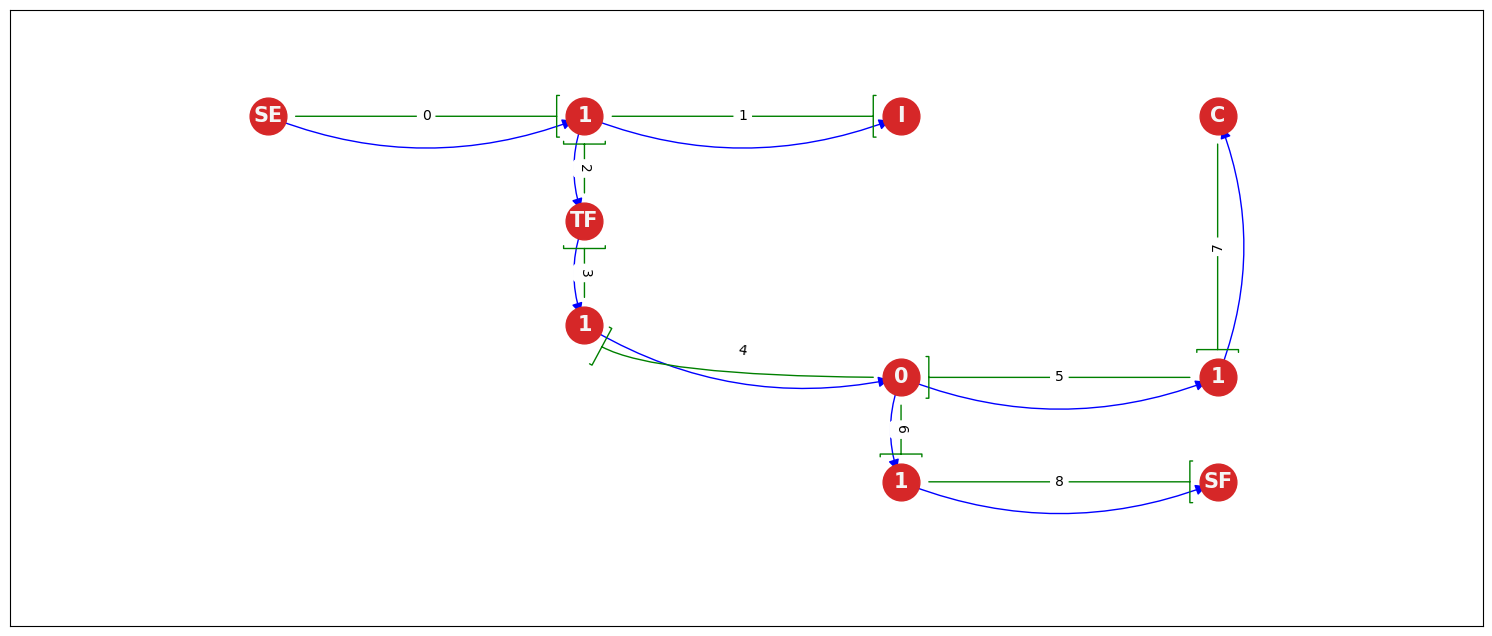

In [10]:
# set positions manually
SE_1.setPosition([1,7])
OneJ_1.setPosition([2,7])
I_1.setPosition([3,7])

TF_1.setPosition([2,5])

OneJ_2.setPosition([2,3])
OneJ_3.setPosition([4,2])
ZeroJ_1.setPosition([3,2])

C_1.setPosition([4,7])
SF_1.setPosition([4,0])
OneJ_4.setPosition([3,0])

# draw
model.draw()

In [10]:
# model.verifyRules()
model.applyRules()

In [11]:
bg.show_ports_state(model)

Element name:  1_4
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 5 |  arrow:  Output |  causality:  Causal
Element name:  1_5
++ port_id: 7 |  arrow:  Input |  causality:  Uncausal
++ port_id: 8 |  arrow:  Output |  causality:  Causal
Element name:  1_6
++ port_id: 11 |  arrow:  Input |  causality:  Uncausal
++ port_id: 15 |  arrow:  Output |  causality:  Causal
Element name:  1_7
++ port_id: 13 |  arrow:  Input |  causality:  Causal
++ port_id: 16 |  arrow:  Output |  causality:  Uncausal
Element name:  0_8
++ port_id: 9 |  arrow:  Input |  causality:  Uncausal
++ port_id: 10 |  arrow:  Output |  causality:  Causal
++ port_id: 12 |  arrow:  Output |  causality:  Uncausal
Element name:  C_2
++ port_id: 14 |  arrow:  Input |  causality:  Uncausal
Element name:  I_3
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  SE_1
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  SF_9
+

## assign_equations SEQ


In [11]:
model.assign_equations()
equations = model.get_model_equations()


assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 1 4 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 4 3 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 4 0 , type:  1 TF -----------------------
from 1 to TF detected Output Input
Fr 1 to TF Bond = 2 el1 eff= +e0-e1-e2 el1 flow= +f0=+f1=+f2 EL2 eff= None el2 flow= None
TFs flow prepared:  +f2*1/n0
-++TF effort=  flow= +f0=+f1=+f2
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 5 , type:  TF 1 -----------------------
from TF to 1 detected Output Input
Fr TF to 1 conn... Bond iD= 3 elem1 eff= None el1 flow= +f2*1/n0 elem2 eff= +e3-e4 elem2 fl= +f3=+f4
TF prepare effort +e3*n0
-+-TF effort= +e3=+e4 flow= +f3=+f2*1/n0
BOND ID= 3
.....for elements C, I, R, SE, SF
both elements found...id-s: 5 8 , type:  1 0 -----------------------
.....for e

In [12]:
equations

['+e0=+SE1',
 '+f0=+f1=+f2',
 '+e1=+e0-e2',
 '+f1=+1/I3*p3',
 '+e2=+e3*n0',
 '+f0=+f1=+f2',
 '+e3=+e4',
 '+f3=+f2*1/n0',
 '+e4=+e5=+e6',
 '+f3=+f4',
 '+e5=+e7',
 '+f5=+f4-f6',
 '+e6=+e8',
 '+f6=+f8',
 '+e7=+1/C2*q2',
 '+f5=+f7',
 '+e8=+e6',
 '+f8=+SF9']

## State-space form sequence

In [17]:
cauchy_state_equastions, variables_exp = model.cauchy_form_equastions_sequence()

assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 1 4 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 4 3 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 4 0 , type:  1 TF -----------------------
from 1 to TF detected Output Input
Fr 1 to TF Bond = 2 el1 eff= +e0-e1-e2 el1 flow= +f0=+f1=+f2 EL2 eff= +e3*n0 el2 flow= +f2*1/n0
-++TF effort= +e2=+e3*n0 flow= +f0=+f1=+f2
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 5 , type:  TF 1 -----------------------
from TF to 1 detected Output Input
Fr TF to 1 conn... Bond iD= 3 elem1 eff= +e3*n0 el1 flow= +f2*1/n0 elem2 eff= +e3-e4 elem2 fl= +f3=+f4
-+-TF effort= +e3=+e4 flow= +f3=+f2*1/n0
BOND ID= 3
.....for elements C, I, R, SE, SF
both elements found...id-s: 5 8 , type:  1 0 -----------------------
.....for elements C, I, R, SE, SF
both element

In [18]:
model.final_variables

[SE1, SF9, q2, p3, C2, I3, n0]

In [19]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print("State variables: ", model.state_variables)

############## STATE EQUASIONS ############
dq2/dt = -SF9 + p3/(I3*n0)
dp3/dt = SE1 - n0*q2/C2
####################################################
State variables:  [q2, p3]


In [20]:
print('effort-flow list:', model.eff_flows_sp, '\nvariables list:', model.final_variables, '\n inputs:', model.input_variables)

effort-flow list: [f0, e8, e5, f2, f8, f4, e6, e2, f3, f6, e1, e4, e3, f5, f1, e0, f7, e7] 
variables list: [SE1, SF9, q2, p3, C2, I3, n0] 
 inputs: [SE1, SF9]


In [21]:
variables_exp

{f0: [f1],
 e8: [e6],
 e5: [e7],
 f2: [f0],
 f8: [SF9],
 f4: [f3],
 e6: [e4],
 e2: [e3*n0],
 f3: [f2/n0],
 f6: [f8],
 e1: [e0 - e2],
 e4: [e5],
 e3: [e4],
 f5: [f4 - f6],
 f1: [p3/I3],
 e0: [SE1],
 f7: [f5],
 e7: [q2/C2]}

## Make state-space eq in matrix from

In [22]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.get_matrix_A()} \n Matrix B: {model.get_matrix_B()}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
() --------------
(-1, n0, q2, 1/C2) --------------
Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]])
(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
() --------------
(-1, n0, q2, 1/C2) --------------
Matrix([[0, -1], [1, 0]])
Matrix A: Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]]) 
 Matrix B: Matrix([[0, -1], [1, 0]])
 input_variables: [SE1, SF9] 
 state_variables: [q2, p3]


In [23]:
model.get_matrix_A()

Matrix([
[     0, 1/(I3*n0)],
[-n0/C2,         0]])

In [24]:
model.get_matrix_B()

Matrix([
[0, -1],
[1,  0]])

## Make С-D-matrix
Now we can set the input variables and get С-D-matrix

In [25]:
output_variables = "e7,f7"
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp, output_variables)

Input the names of output variables:
It mast be in list eff_flows:  [f0, e8, e5, f2, f8, f4, e6, e2, f3, f6, e1, e4, e3, f5, f1, e0, f7, e7] (Velocity of Force at some point)
U entered this:  ['e7', 'f7']
output variable=  e7
first match [q2/C2]
output variable=  f7
first match [f5]
next iteration with expression: f4 - f6
next iteration with expression: f3 - f8
next iteration with expression: -SF9 + f2/n0
next iteration with expression: -SF9 + f0/n0
next iteration with expression: -SF9 + f1/n0
next iteration with expression: -SF9 + p3/(I3*n0)


In [26]:
cauchy_form_output_eq

{e7: q2/C2, f7: -SF9 + p3/(I3*n0)}

In [27]:
model.make_output_statespace(cauchy_form_output_eq)
print(model.get_matrix_C(), model.get_matrix_D())

(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[1/C2, 0], [0, 1/(I3*n0)]])
(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[0, 0], [0, -1]])
Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]]) Matrix([[0, -1], [1, 0]])


## Make numerical matrixes from symbolic

In [28]:
print('List of system parameters:', model.parameter_variables)
parameters_list = model.parameter_variables

parameters_values = [1/10, 0.1, 2]


List of system parameters: [C2, I3, n0]


In [29]:
# k = 10
# 1/k

In [30]:
model.input_variables

[SE1, SF9]

In [31]:
# initial state
# initial_state = np.random.rand(len(model.state_variables),1)
initial_state = np.zeros((len(model.state_variables),1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps=100
sampling_period=0.5
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 1] = 0

initial_state:  [[0.]
 [0.]]


In [32]:
# set initial state values

initial_state[0] = 0
initial_state[1] = 1

In [33]:
def integrate(output,  initial_state = 0):
    integral = np.zeros(len(output))
    integral[0] = initial_state
    for i in range(1, len(output)):
        integral[i] = integral[i-1] + output[i]
    return integral

In [34]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


In [35]:
output_pos = integrate(output[1,:-1])


print(f'output size: {output[0,:-1].shape} state size: {initial_state.shape}')

output size: (100,) state size: (2, 1)


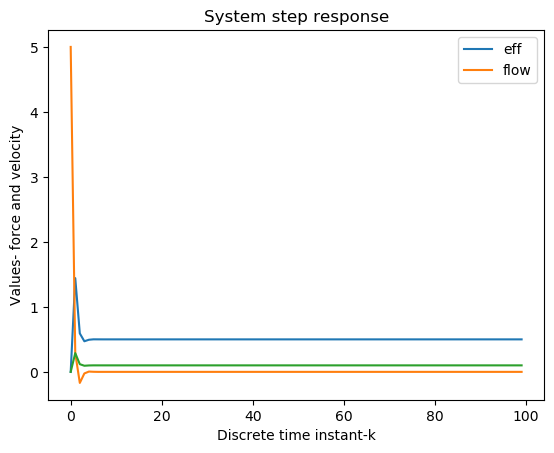

In [36]:
plt.plot(output[0,:-1])
plt.plot(output[1,:-1])

plt.plot(output_pos)

plt.xlabel('Discrete time instant-k')
plt.ylabel('Values- force and velocity')
plt.title('System step response')
plt.legend (('eff', 'flow'))